<a href="https://colab.research.google.com/github/nyamskamau/Housing-Price-Prediction-Dataset-Week-7/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Dataset with Decision Trees

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("House.csv")

In [3]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
data.shape

(21613, 20)

The dataset cantains 20 house features plus the price, along with 21613 observations.

The description for the 20 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

## Exploring the Data

Checking for nulls and duplicates.

In [10]:
data.isnull().sum().sum()

0

In [12]:
data.duplicated().sum()

3

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

Looking at the Target Variable

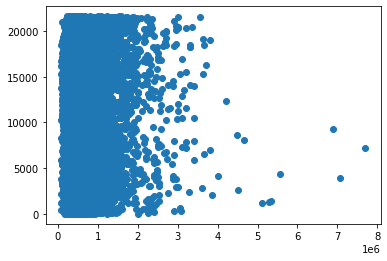

In [17]:
plt.scatter(x=data.price,y=data.index)

In [18]:
data.price.describe()

count    2.161000e+04
mean     5.401789e+05
std      3.673876e+05
min      7.500000e+04
25%      3.216125e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

I then dropped the Id column in order to plot a correlation matrix.

In [19]:
data.drop('id',axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21610 non-null  float64
 1   bedrooms       21610 non-null  int64  
 2   bathrooms      21610 non-null  float64
 3   sqft_living    21610 non-null  int64  
 4   sqft_lot       21610 non-null  int64  
 5   floors         21610 non-null  float64
 6   waterfront     21610 non-null  int64  
 7   view           21610 non-null  int64  
 8   condition      21610 non-null  int64  
 9   grade          21610 non-null  int64  
 10  sqft_above     21610 non-null  int64  
 11  sqft_basement  21610 non-null  int64  
 12  yr_built       21610 non-null  int64  
 13  yr_renovated   21610 non-null  int64  
 14  zipcode        21610 non-null  int64  
 15  lat            21610 non-null  float64
 16  long           21610 non-null  float64
 17  sqft_living15  21610 non-null  int64  
 18  sqft_l

In [21]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265


The Price variable is highly correlated with
 1. sqft_living at 0.702046
 2. grade at 0.667478
 3. sqft_above at 0.605569
 4. sqft_living15 at 0.585382
 5. bathrooms at 0.525140
 6. view at 0.397466
 7. sqft_basement at 0.323849
 8. bedrooms at 0.308346
 9. lat at 0.306922
 10. waterfromt at 0.266332
 11. floors at 0.256793
 12. yr_renovated at 0.126503



Training my model on these features

In [33]:
X = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms']]
y = data.price

Importing the necessary libraries to carry out regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler

Trail 1 : Decision Trees

In [42]:
sc = StandardScaler()
sc = sc.fit_transform(X)

In [ ]:
X

In [44]:
decision_tree = DecisionTreeRegressor(max_depth=5)
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
decision_tree = decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

In [49]:
print('Mean squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean squared Error: 42550255790.68756
Root Mean Squared Error: 206277.13346536394


In [38]:
metrics.r2_score(y_test,y_pred)

0.6762274015709627

Trial 2 : Random Forest

In [99]:
random_forest = RandomForestRegressor(n_estimators=400)
random_forest = random_forest.fit(X_train,y_train)
y_predicted = random_forest.predict(X_test)


In [100]:
print('Mean squared Error:', metrics.mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predicted)))

Mean squared Error: 20795147821.570866
Root Mean Squared Error: 144205.22813535875


In [101]:
metrics.r2_score(y_test,y_predicted)

0.8417659560490943

Trail 3 : AdaBoost 

In [64]:
adr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=15), n_estimators=200,learning_rate=0.8)
adr = adr.fit(X_train,y_train)
y_prediction = adr.predict(X_test)

In [65]:
print('Mean squared Error:', metrics.mean_squared_error(y_test,y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

Mean squared Error: 19803263433.166763
Root Mean Squared Error: 140724.06842174073


In [66]:
metrics.r2_score(y_test,y_prediction)

0.8493133839036897

Trail four : Gradient Boosting

In [90]:
gbr = GradientBoostingRegressor(n_estimators = 200,learning_rate=0.4,max_depth=2)
gbr = gbr.fit(X_train,y_train)
y_predct = gbr.predict(X_test)

In [91]:
print('Mean squared Error:', metrics.mean_squared_error(y_test,y_predct))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predct)))

Mean squared Error: 22031520063.723415
Root Mean Squared Error: 148430.18582391998


In [92]:
metrics.r2_score(y_test,y_predct)

0.8323581758600296